In [1]:
import matplotlib.pyplot as plt
import numpy as np
from VegasAfterglow import ISM, TophatJet, Observer, Radiation, Model

In [3]:
# 1. Define the circumburst environment (constant density ISM)
medium = ISM(n_ism=1)

# 2. Configure the jet structure (top-hat with opening angle, energy, and Lorentz factor)
jet = TophatJet(theta_c=0.1, E_iso=1e52, Gamma0=300)

# 3. Set observer parameters (distance, redshift, viewing angle)
obs = Observer(lumi_dist=1e26, z=0.1, theta_obs=0)

# 4. Define radiation microphysics parameters
rad = Radiation(eps_e=1e-1, eps_B=1e-3, p=2.3)

# 5. Combine all components into a complete afterglow model
model = Model(jet=jet, medium=medium, observer=obs, fwd_rad=rad)

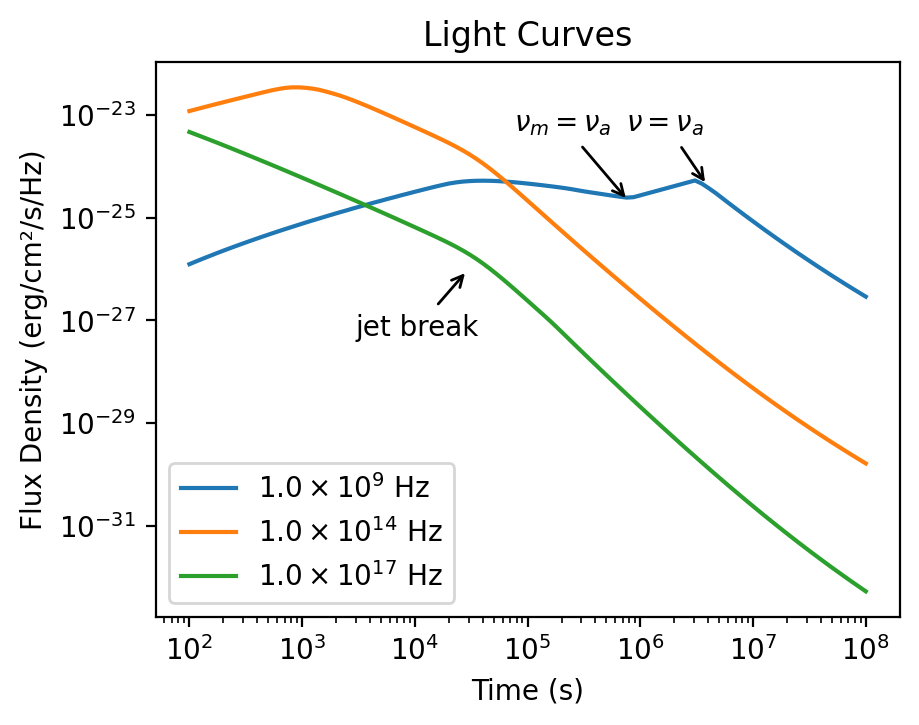

In [4]:
# 1. Create logarithmic time array from 10² to 10⁸ seconds (100s to ~3yrs)
times = np.logspace(2, 8, 100)  

# 2. Define observing frequencies (radio, optical, X-ray bands in Hz)
bands = np.array([1e9, 1e14, 1e17])  

# 3. Calculate the afterglow emission at each time and frequency
results = model.flux_density_grid(times, bands)

# 4. Visualize the multi-wavelength light curves
plt.figure(figsize=(4.8, 3.6),dpi=200)

# 5. Plot each frequency band 
for i, nu in enumerate(bands):
    exp = int(np.floor(np.log10(nu)))
    base = nu / 10**exp
    plt.loglog(times, results.total[i,:], label=fr'${base:.1f} \times 10^{{{exp}}}$ Hz')

def add_note(plt):
    plt.annotate('jet break',xy=(3e4, 1e-26), xytext=(3e3, 5e-28), arrowprops=dict(arrowstyle='->'))
    plt.annotate(r'$\nu_m=\nu_a$',xy=(8e5, 2e-25), xytext=(7.5e4, 5e-24), arrowprops=dict(arrowstyle='->'))
    plt.annotate(r'$\nu=\nu_a$',xy=(4e6, 4e-25), xytext=(7.5e5, 5e-24), arrowprops=dict(arrowstyle='->'))

add_note(plt)   
plt.xlabel('Time (s)')
plt.ylabel('Flux Density (erg/cm²/s/Hz)')
plt.legend()
plt.title('Light Curves')
plt.savefig('quick-lc.png',dpi=300,bbox_inches='tight')

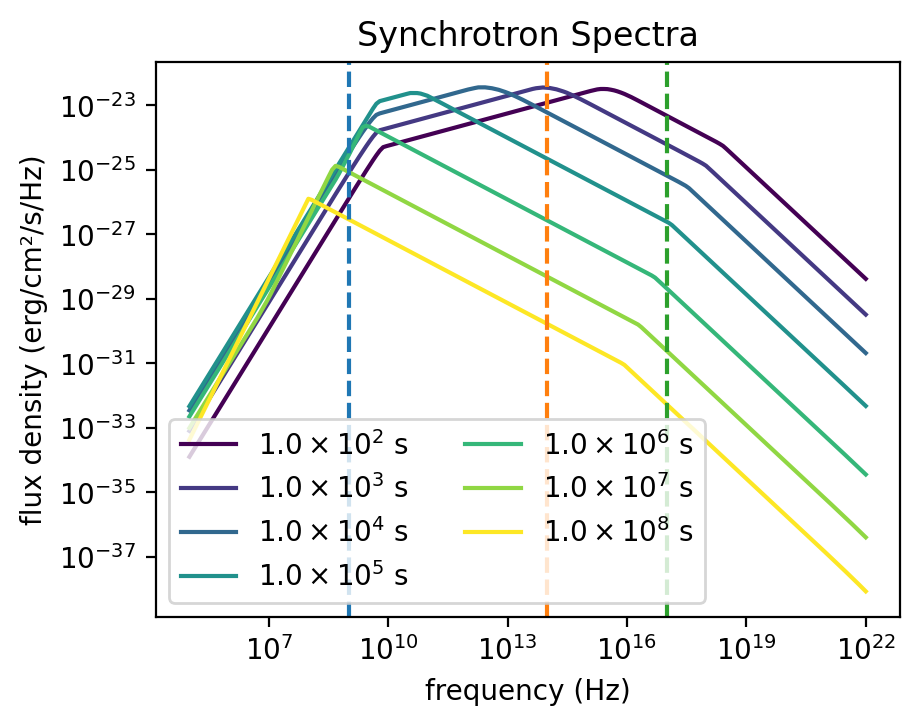

In [4]:
# 1. Define broad frequency range (10⁵ to 10²² Hz) 
frequencies = np.logspace(5, 22, 200)  

# 2. Select specific time epochs for spectral snapshots 
epochs = np.array([1e2, 1e3, 1e4, 1e5 ,1e6, 1e7, 1e8])

# 3. Calculate spectra at each epoch
results = model.flux_density_grid(epochs, frequencies)

# 4. Plot broadband spectra at each epoch
plt.figure(figsize=(4.8, 3.6),dpi=200)
colors = plt.cm.viridis(np.linspace(0,1,len(epochs)))

for i, t in enumerate(epochs):
    exp = int(np.floor(np.log10(t)))
    base = t / 10**exp
    plt.loglog(frequencies, results.total[:,i], color=colors[i], label=fr'${base:.1f} \times 10^{{{exp}}}$ s')

# 5. Add vertical lines marking the bands from the light curve plot
for i, band in enumerate(bands):
    exp = int(np.floor(np.log10(band)))
    base = band / 10**exp
    plt.axvline(band,ls='--',color='C'+str(i))

plt.xlabel('frequency (Hz)')
plt.ylabel('flux density (erg/cm²/s/Hz)')
plt.legend(ncol=2)
plt.title('Synchrotron Spectra')
plt.savefig('quick-spec.png',dpi=300,bbox_inches='tight')